# Working with Sequence Data using `R` and `Bioconductor`

`Bioconductor` is a collection ([> 2000](https://www.bioconductor.org/packages/release/BiocViews.html#___Software)) of `R` packages focused on biological data analysis.

**Packages we will use today**


- [`Biostrings`](https://bioconductor.org/packages/release/bioc/html/Biostrings.html) for working with DNA, RNA, and protein sequences
- [`rtracklayer`](https://bioconductor.org/packages/release/bioc/html/rtracklayer.html) for working with sequence annotation files (GFF, BED)
- [`plyranges`](https://bioconductor.org/packages/release/bioc/html/plyranges.html) for a `tidyverse`-like interface to Bioconductor data objects. 
- [`BSgenome.Hsapiens.UCSC.hg38`](https://bioconductor.org/packages/release/data/annotation/html/BSgenome.Hsapiens.UCSC.hg38.html) for human genome sequence data
- [`GenomicFeatures`](https://bioconductor.org/packages/release/bioc/html/GenomicFeatures.html) for working with transcript annotations
- [`ggbio`](https://www.bioconductor.org/packages/release/bioc/html/ggbio.html) GGplot2-like plotting interface for biological data

## Package Installation

For installing `Bioconductor` packages using `conda`, I search for the package name + `conda` for finding the relevant `conda` package name and repository.

For example, the first link [here](https://www.google.com/search?q=biostrings+conda) is the `conda` package for `biostrings` which I would install as:

```bash
conda activate tidy # tidy is name of R environment
conda install -c bioconda bioconductor-biostrings
```

## How to learn further

- `Documentation` section of package homepage on `Bioconductor` website, eg. [`plyranges`](https://bioconductor.org/packages/release/bioc/html/plyranges.html)
- Bioconductor workshops, eg. [`plyranges`](https://bioconductor.github.io/BiocWorkshops/fluent-genomic-data-analysis-with-plyranges.htmlhttps://bioconductor.org/workshops/plyranges/)
- [Q & A](https://support.bioconductor.org/) section of `Bioconductor` website

## Load packages

Note: Many functions are named the same across different packages. For example, `select`, `n`, `rename` etc. This can lead to confusing errors.

If you are getting errors when you use a function, try loading the packages in a different order or specify the package name explicitly. For example, use `dplyr::rename()`, `plyranges::select()`, etc.

In [6]:
suppressPackageStartupMessages({
  library(Biostrings)
  library(rtracklayer)
  library(plyranges)
  library(tidyverse)
})

## Working with sequence data using `Biostrings`

In [7]:
#takes a fasta 
seqs <- readDNAStringSet("data/tumor_suppressors.fasta") %>%
  print()

DNAStringSet object of length 5:
    width seq                                               names               
[1]  1182 ATGGAGGAGCCGCAGTCAGATCC...CAGAAGGGCCTGACTCAGACTGA TP53
[2]  1212 ATGACAGCCATCATCAAAGAGAT...ATACACAAATTACAAAAGTCTGA PTEN
[3]  5655 ATGGATTTATCTGCTCTTCGCGT...AGATCCCCCACAGCCACTACTGA BRCA1
[4] 10257 ATGCCTATTGGATCCAAAGAGAG...TTACAACTAAAAAATATATCTAA BRCA2
[5]  2787 ATGCCGCCCAAAACCCCCCGAAA...CCTCAAACAAGGAAGAGAAATGA RB1


Reverse complement

In [8]:
seqs %>%
  reverseComplement()

DNAStringSet object of length 5:
    width seq                                               names               
[1]  1182 TCAGTCTGAGTCAGGCCCTTCTG...GGATCTGACTGCGGCTCCTCCAT TP53
[2]  1212 TCAGACTTTTGTAATTTGTGTAT...ATCTCTTTGATGATGGCTGTCAT PTEN
[3]  5655 TCAGTAGTGGCTGTGGGGGATCT...ACGCGAAGAGCAGATAAATCCAT BRCA1
[4] 10257 TTAGATATATTTTTTAGTTGTAA...CTCTCTTTGGATCCAATAGGCAT BRCA2
[5]  2787 TCATTTCTCTTCCTTGTTTGAGG...TTTCGGGGGGTTTTGGGCGGCAT RB1

Translate

In [9]:
seqs %>%
  translate()

AAStringSet object of length 5:
    width seq                                               names               
[1]   394 MEEPQSDPSVEPPLSQETFSDLW...KKGQSTSRHKKLMFKTEGPDSD* TP53
[2]   404 MTAIIKEIVSRNKRRYQEDGFDL...TTDSDPENEPFDEDQHTQITKV* PTEN
[3]  1885 MDLSALRVEEVQNVINAMQKILE...VALYQCQELDTYLIPQIPHSHY* BRCA1
[4]  3419 MPIGSKERPTFFEIFKTRCNKAD...SQASTEECEKNKQDTITTKKYI* BRCA2
[5]   929 MPPKTPRKTAATAAAAAAEPPAP...TRTRMQKQKMNDSMDTSNKEEK* RB1

Get a sub-sequence

In [10]:
seqs %>%
  subseq(1,10)

DNAStringSet object of length 5:
    width seq                                               names               
[1]    10 ATGGAGGAGC                                        TP53
[2]    10 ATGACAGCCA                                        PTEN
[3]    10 ATGGATTTAT                                        BRCA1
[4]    10 ATGCCTATTG                                        BRCA2
[5]    10 ATGCCGCCCA                                        RB1

Calculate codon frequencies

In [11]:
seqs %>%
#size of codon and step size 
  oligonucleotideFrequency(width = 3, step = 3) %>%
  as_tibble()

AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
7,10,13,4,7,9,2,4,3,8,...,0,7,1,6,4,4,0,7,6,4
19,7,15,16,9,5,0,7,8,4,...,0,4,1,4,2,6,7,10,3,15
80,40,58,83,38,24,7,42,35,44,...,2,66,1,12,10,32,34,16,34,34
228,63,94,167,80,29,8,103,65,33,...,4,121,0,15,20,61,84,26,51,110
60,14,16,31,23,12,2,18,15,9,...,3,22,1,3,7,12,19,13,17,26


You can also read `fastq` files but not recommended for large files

See `ShortRead` package for working with large number of sequence reads

In [20]:
readDNAStringSet("../lecture08/barcodes_R1.fastq", format = "fastq") %>%
  reverseComplement() %>%
  # convert to a tibble
  as.data.frame() %>%
  rownames_to_column() %>%
  setNames(c("name", "seq")) %>%
  as_tibble() %>%
  # # ----------------
  mutate(is_HA = str_detect(seq, "CCGGATTTGCATATAATGATGCACCAT")) %>%
  mutate(is_NA = str_detect(seq, "CACGATAGATAAATAATAGTGCACCAT")) %>%
  mutate(barcode = substr(seq, nchar(seq) - 16, nchar(seq))) %>%
   # select(-seq)
   group_by(is_HA, is_NA, barcode) %>%
   summarize(n_HA = sum(is_HA), n_NA = sum(is_NA)) %>%
   filter(n_NA > 0) %>%
   arrange(-n_NA) %>%
  print()

`summarise()` has grouped output by 'is_HA', 'is_NA'. You can override using
the `.groups` argument.


# A tibble: 163 x 5
# Groups:   is_HA, is_NA [1]
   is_HA is_NA barcode            n_HA  n_NA
   <lgl> <lgl> <chr>             <int> <int>
 1 FALSE TRUE  CACCAGTTCTCCCCGGG     0   153
 2 FALSE TRUE  CTCAAGAAGCCTTGGAG     0   150
 3 FALSE TRUE  CTGACGATCCTCAAGAA     0   143
 4 FALSE TRUE  CCGTCTTCCATCCCCAT     0   133
 5 FALSE TRUE  CAATCGTACATCCCCAC     0   124
 6 FALSE TRUE  CTCTGGCAGGCCTCGCT     0   124
 7 FALSE TRUE  CCTACCCGTTTCCCAAC     0   123
 8 FALSE TRUE  CATAAACGTTCCCCAAG     0   108
 9 FALSE TRUE  CCCAGCCTCACACTAGC     0   108
10 FALSE TRUE  CCTTACCATATTACAAA     0   108
# i 153 more rows


# How do we get sequence data for a specific gene or transcript?

In [22]:
BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'BSgenome.Hsapiens.UCSC.hg38'

also installing the dependency 'BSgenome'





The downloaded binary packages are in
	/var/folders/mc/f3s_v4bd123dbbh9szllycmh0000gn/T//Rtmp50ZLU4/downloaded_packages


installing the source package 'BSgenome.Hsapiens.UCSC.hg38'


Old packages: 'R.oo', 'Rcpp', 'curl', 'fs', 'ggfun', 'httr2', 'knitr',
  'pkgbuild', 'ps', 'rmarkdown', 'rstudioapi', 'tinytex', 'waldo', 'xfun',
  'yulab.utils'



In [23]:
genome <- BSgenome.Hsapiens.UCSC.hg38::BSgenome.Hsapiens.UCSC.hg38

Chromosome names

In [24]:
seqnames(genome) 

[1] "chr1"                    "chr2"                   
  [3] "chr3"                    "chr4"                   
  [5] "chr5"                    "chr6"                   
  [7] "chr7"                    "chr8"                   
  [9] "chr9"                    "chr10"                  
 [11] "chr11"                   "chr12"                  
 [13] "chr13"                   "chr14"                  
 [15] "chr15"                   "chr16"                  
 [17] "chr17"                   "chr18"                  
 [19] "chr19"                   "chr20"                  
 [21] "chr21"                   "chr22"                  
 [23] "chrX"                    "chrY"                   
 [25] "chrM"                    "chr1_GL383518v1_alt"    
 [27] "chr1_GL383519v1_alt"     "chr1_GL383520v2_alt"    
 [29] "chr1_KI270759v1_alt"     "chr1_KI270760v1_alt"    
 [31] "chr1_KI270761v1_alt"     "chr1_KI270762v1_alt"    
 [33] "chr1_KI270763v1_alt"     "chr1_KI270764v1_alt"    
 [35] "chr1_KI270765v1_alt"     "chr1_KI270766v1_alt"    
 [37] "chr1_KI270892v1_alt"     "chr2_GL383521v1_alt"    
 [39] "chr2_GL383522v1_alt"     "chr2_GL582966v2_alt"    
 [41] "chr2_KI270767v1_alt"     "chr2_KI270768v1_alt"    
 [43] "chr2_KI270769v1_alt"     "chr2_KI270770v1_alt"    
 [45] "chr2_KI270771v1_alt"     "chr2_KI270772v1_alt"    
 [47] "chr2_KI270773v1_alt"     "chr2_KI270774v1_alt"    
 [49] "chr2_KI270775v1_alt"     "chr2_KI270776v1_alt"    
 [51] "chr2_KI270893v1_alt"     "chr2_KI270894v1_alt"    
 [53] "chr3_GL383526v1_alt"     "chr3_JH636055v2_alt"    
 [55] "chr3_KI270777v1_alt"     "chr3_KI270778v1_alt"    
 [57] "chr3_KI270779v1_alt"     "chr3_KI270780v1_alt"    
 [59] "chr3_KI270781v1_alt"     "chr3_KI270782v1_alt"    
 [61] "chr3_KI270783v1_alt"     "chr3_KI270784v1_alt"    
 [63] "chr3_KI270895v1_alt"     "chr3_KI270924v1_alt"    
 [65] "chr3_KI270934v1_alt"     "chr3_KI270935v1_alt"    
 [67] "chr3_KI270936v1_alt"     "chr3_KI270937v1_alt"    
 [69] "chr4_GL000257v2_alt"     "chr4_GL383527v1_alt"    
 [71] "chr4_GL383528v1_alt"     "chr4_KI270785v1_alt"    
 [73] "chr4_KI270786v1_alt"     "chr4_KI270787v1_alt"    
 [75] "chr4_KI270788v1_alt"     "chr4_KI270789v1_alt"    
 [77] "chr4_KI270790v1_alt"     "chr4_KI270896v1_alt"    
 [79] "chr4_KI270925v1_alt"     "chr5_GL339449v2_alt"    
 [81] "chr5_GL383530v1_alt"     "chr5_GL383531v1_alt"    
 [83] "chr5_GL383532v1_alt"     "chr5_GL949742v1_alt"    
 [85] "chr5_KI270791v1_alt"     "chr5_KI270792v1_alt"    
 [87] "chr5_KI270793v1_alt"     "chr5_KI270794v1_alt"    
 [89] "chr5_KI270795v1_alt"     "chr5_KI270796v1_alt"    
 [91] "chr5_KI270897v1_alt"     "chr5_KI270898v1_alt"    
 [93] "chr6_GL000250v2_alt"     "chr6_GL000251v2_alt"    
 [95] "chr6_GL000252v2_alt"     "chr6_GL000253v2_alt"    
 [97] "chr6_GL000254v2_alt"     "chr6_GL000255v2_alt"    
 [99] "chr6_GL000256v2_alt"     "chr6_GL383533v1_alt"    
[101] "chr6_KB021644v2_alt"     "chr6_KI270758v1_alt"    
[103] "chr6_KI270797v1_alt"     "chr6_KI270798v1_alt"    
[105] "chr6_KI270799v1_alt"     "chr6_KI270800v1_alt"    
[107] "chr6_KI270801v1_alt"     "chr6_KI270802v1_alt"    
[109] "chr7_GL383534v2_alt"     "chr7_KI270803v1_alt"    
[111] "chr7_KI270804v1_alt"     "chr7_KI270805v1_alt"    
[113] "chr7_KI270806v1_alt"     "chr7_KI270807v1_alt"    
[115] "chr7_KI270808v1_alt"     "chr7_KI270809v1_alt"    
[117] "chr7_KI270899v1_alt"     "chr8_KI270810v1_alt"    
[119] "chr8_KI270811v1_alt"     "chr8_KI270812v1_alt"    
[121] "chr8_KI270813v1_alt"     "chr8_KI270814v1_alt"    
[123] "chr8_KI270815v1_alt"     "chr8_KI270816v1_alt"    
[125] "chr8_KI270817v1_alt"     "chr8_KI270818v1_alt"    
[127] "chr8_KI270819v1_alt"     "chr8_KI270820v1_alt"    
[129] "chr8_KI270821v1_alt"     "chr8_KI270822v1_alt"    
[131] "chr8_KI270900v1_alt"     "chr8_KI270901v1_alt"    
[133] "chr8_KI270926v1_alt"     "chr9_GL383539v1_alt"    
[135] "chr9_GL383540v1_alt"     "chr9_GL383541v1_alt"    
[137] "chr9_GL383542v1_alt"     "chr9_KI270823v1_alt"    


Chromosome sequence

In [25]:
chr2 <- genome$chr2

Read annotations for a group of genes

These are a subset of the full genome annotations in the [GENCODE](https://www.gencodegenes.org/) project.

In [ ]:
#gff is a tab deliminated file that you need to parse a specific gene information. GRanges is a df for bioseq analysis 
annotations <- import.gff3("data/tumor_suppressors.gff3") %>%
  print()

GRanges object with 1683 ranges and 23 metadata columns:
         seqnames            ranges strand |   source        type     score
            <Rle>         <IRanges>  <Rle> | <factor>    <factor> <numeric>
     [1]    chr10 87863113-87971930      + |   HAVANA gene               NA
     [2]    chr10 87863113-87971930      + |   HAVANA transcript         NA
     [3]    chr10 87863113-87864548      + |   HAVANA exon               NA
     [4]    chr10 87864470-87864548      + |   HAVANA CDS                NA
     [5]    chr10 87864470-87864472      + |   HAVANA start_codon        NA
     ...      ...               ...    ... .      ...         ...       ...
  [1679]    chr17 43124026-43124115      - |   HAVANA exon               NA
  [1680]    chr17 43124026-43124096      - |   HAVANA CDS                NA
  [1681]    chr17 43124094-43124096      - |   HAVANA start_codon        NA
  [1682]    chr17 43124737-43125364      - |   HAVANA UTR                NA
  [1683]    chr17 43124097-4312

We can convert from `GRanges` to  `tibble` and vice versa.

In [ ]:
annotations %>%
  as_tibble() %>%
  distinct(type) %>%
  #distinct(gene_name) %>%
  # GRanges() # will put it back to a GRange 
  print()

# A tibble: 7 x 1
  type       
  <fct>      
1 gene       
2 transcript 
3 exon       
4 CDS        
5 start_codon
6 stop_codon 
7 UTR        


Group exons into transcripts

We use `split` function with `$` to refer to columns.

Each group is list of `GRanges` or a `GRangesList` object.


In [ ]:
transcripts <- annotations %>%
  filter(type == "exon") %>%
  split(.$transcript_id) #group on transcript ID  (dot is whatever coming through the pipe)
  #as_tibble() 

transcripts

GRangesList object of length 78:
$ENST00000267163.4
GRanges object with 27 ranges and 23 metadata columns:
       seqnames            ranges strand |   source     type     score
          <Rle>         <IRanges>  <Rle> | <factor> <factor> <numeric>
   [1]    chr13 48303775-48304049      + |   HAVANA     exon        NA
   [2]    chr13 48307280-48307406      + |   HAVANA     exon        NA
   [3]    chr13 48342599-48342714      + |   HAVANA     exon        NA
   [4]    chr13 48345080-48345199      + |   HAVANA     exon        NA
   [5]    chr13 48347825-48347863      + |   HAVANA     exon        NA
   ...      ...               ...    ... .      ...      ...       ...
  [23]    chr13 48465205-48465368      + |   HAVANA     exon        NA
  [24]    chr13 48473360-48473390      + |   HAVANA     exon        NA
  [25]    chr13 48476701-48476843      + |   HAVANA     exon        NA
  [26]    chr13 48477355-48477404      + |   HAVANA     exon        NA
  [27]    chr13 48479998-48481986      + 

Visualize transcript models for *TP53* gene

In [31]:
BiocManager::install("ggbio")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'ggbio'

also installing the dependencies 'filelock', 'BiocFileCache', 'checkmate', 'biomaRt', 'htmlTable', 'Formula', 'dichromat', 'RBGL', 'txdbmaker', 'ggstats', 'ProtGenerics', 'Hmisc', 'biovizBase', 'VariantAnnotation', 'GenomicFeatures', 'OrganismDbi', 'GGally', 'ensembldb', 'AnnotationFilter'





The downloaded binary packages are in
	/var/folders/mc/f3s_v4bd123dbbh9szllycmh0000gn/T//Rtmp50ZLU4/downloaded_packages


Old packages: 'R.oo', 'Rcpp', 'curl', 'fs', 'ggfun', 'httr2', 'knitr',
  'pkgbuild', 'ps', 'rmarkdown', 'rstudioapi', 'tinytex', 'waldo', 'xfun',
  'yulab.utils'



Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Constructing graphics...

Warning message in (function (mapping = NULL, data = NULL, stat = "identity", position = "identity", :
"Ignoring unknown parameters: `group.selfish`"


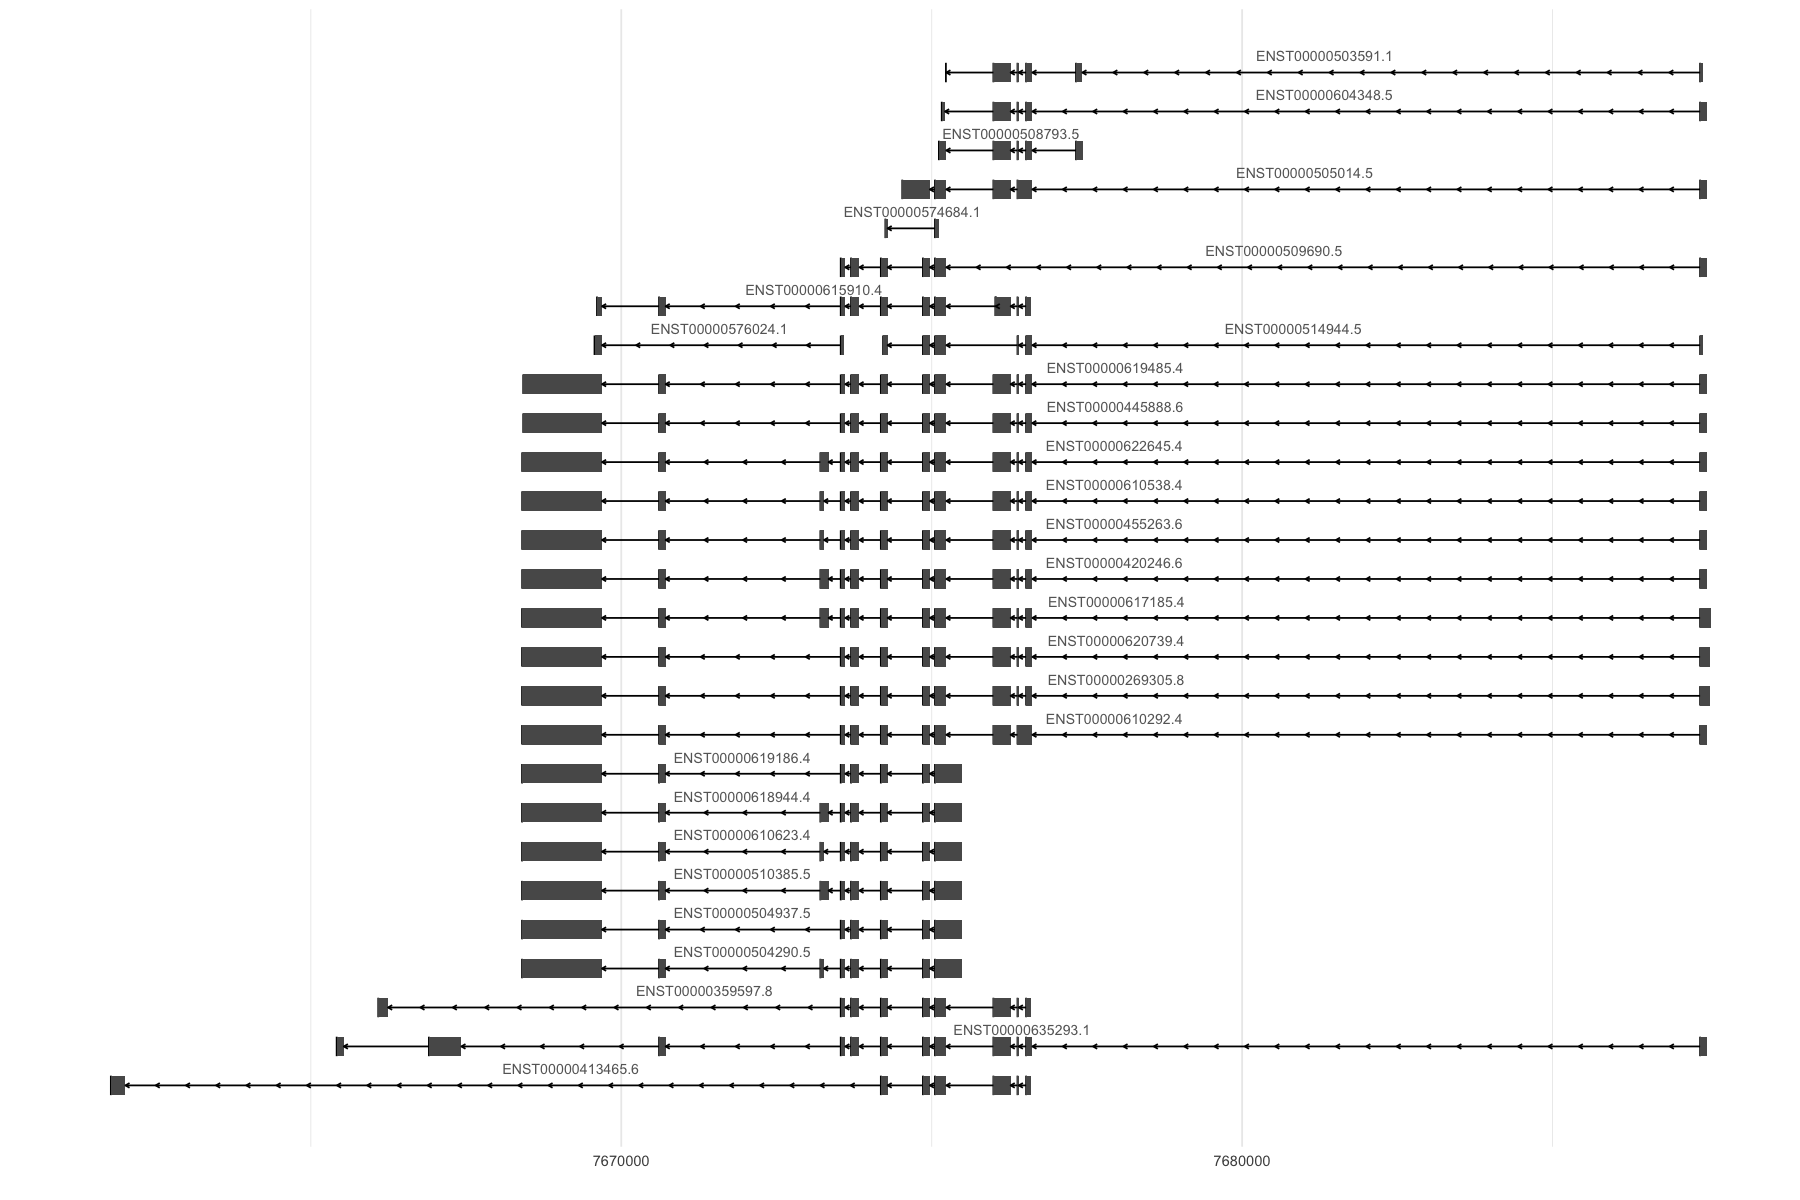

In [32]:
options(repr.plot.width = 15, repr.plot.height = 10)
annotations %>%
  filter(type == "exon") %>%
  filter(gene_name == "TP53") %>%
  split(.$transcript_id) %>%
  ggbio::autoplot() +
  theme_minimal()

## How do we extract transcript sequences?

In [33]:
GenomicFeatures::extractTranscriptSeqs(genome, transcripts)

DNAStringSet object of length 78:
     width seq                                              names               
 [1]  4840 TCCGGTTTTTCTCAGGGGACGTT...TAACTCTCCTAGTATCTCATCC ENST00000267163.4
 [2]  2579 GTTTTCCCCTCCCATGTGCTCAA...CCACCTGTGTGTCTGAGGGGTG ENST00000269305.8
 [3]  3668 GAGCTCGCTGAGACTTCCTGGAC...AACTTGGTAGCAAACACTTCCA ENST00000352993.7
 [4]  4497 GGGCCCCTGCGCTCAGGAGGCCT...GTCCTGCCAATGAGAAGAAAAA ENST00000354071.7
 [5]  7094 GAGCTCGCTGAGACTTCCTGGAC...AACTTGGTAGCAAACACTTCCA ENST00000357654.7
 ...   ... ...
[74]  2579 GTTTTCCCCTCCCATGTGCTCAA...CCACCTGTGTGTCTGAGGGGTG ENST00000620739.4
[75]   375 AAATAATTTCATGGGCATTAATT...ATAAAGAACCAGGAGTGGAAAG ENST00000621897.1
[76]  2653 CTAGAGCCACCGTCCAGGGAGCA...TGCCACCTGTGTGTCTGAGGGG ENST00000622645.4
[77]  2534 AAAGCGTGGGAATTACAGATAAA...TTGGGACATGAAGTTAACCACA ENST00000634433.1
[78]  1883 TCTCAAAAGTCTAGAGCCACCGT...AAAATTAAACTTATATTTATTC ENST00000635293.1

# In-class exercises

(20 minutes)

### 1. Extract the coding sequence for all the transcripts in the annotation file above. 

The steps are identical to above except that you need to work with `CDS` features instead of `exon` features.

If everything worked correctly, you should at least have the expected start and stop codons at the termini of each coding sequence.

In [36]:
cds_transcripts <- annotations %>%
  filter(type == "CDS") %>%
  split(.$transcript_id) 

In [37]:
GenomicFeatures::extractTranscriptSeqs(genome, cds_transcripts)

DNAStringSet object of length 63:
     width seq                                              names               
 [1]  2787 ATGCCGCCCAAAACCCCCCGAAA...CTCAAACAAGGAAGAGAAATGA ENST00000267163.4
 [2]  1182 ATGGAGGAGCCGCAGTCAGATCC...AGAAGGGCCTGACTCAGACTGA ENST00000269305.8
 [3]  2166 ATGGATTTATCTGCTCTTCGCGT...GATCCCCCACAGCCACTACTGA ENST00000352993.7
 [4]  4200 ATGGATTTATCTGCTCTTCGCGT...ACAAATTTCCAAGTATAGTTAA ENST00000354071.7
 [5]  5592 ATGGATTTATCTGCTCTTCGCGT...GATCCCCCACAGCCACTACTGA ENST00000357654.7
 ...   ... ...
[59]  1065 ATGGATGATTTGATGCTGTCCCC...AGAAGGGCCTGACTCAGACTGA ENST00000619485.4
[60]  1065 ATGGATGATTTGATGCTGTCCCC...AGAAGGGCCTGACTCAGACTGA ENST00000620739.4
[61]   909 ATGGATGATTTGATGCTGTCCCC...CTTTCAAAAAGAAAATTGTTAA ENST00000622645.4
[62]  2395 ATGGATTTATCTGCTCTTCGCGT...TTGGGACATGAAGTTAACCACA ENST00000634433.1
[63]  1233 ATGGATGATTTGATGCTGTCCCC...GGTATGCAGTGTGATGATTTGA ENST00000635293.1

### 2. Find the transcripts with the longest coding sequence for each gene

**Steps**

- Convert annotations to a `tibble`
- Filter for `CDS` features
- Group by gene name and transcript id
- Sum the `width` column for each group
- Group by gene name and filter for the transcript with the longest `width` column

In [ ]:
cds_transcripts_by_gene <- annotations %>%
  as_tibble() %>% 
  filter(type == "CDS")  %>% 
  group_by(gene_name, transcript_id)  %>% 
  summarise(width) %>% 
  mutate(total_width = sum(width))  %>% 
  print()

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
i Please use `reframe()` instead.
i When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly."
`summarise()` has grouped output by 'gene_name', 'transcript_id'. You can
override using the `.groups` argument.


# A tibble: 566 x 4
# Groups:   gene_name, transcript_id [63]
   gene_name transcript_id     width total_width
   <chr>     <chr>             <int>       <int>
 1 BRCA1     ENST00000352993.7    80        2166
 2 BRCA1     ENST00000352993.7    54        2166
 3 BRCA1     ENST00000352993.7    78        2166
 4 BRCA1     ENST00000352993.7    89        2166
 5 BRCA1     ENST00000352993.7   140        2166
 6 BRCA1     ENST00000352993.7   106        2166
 7 BRCA1     ENST00000352993.7    46        2166
 8 BRCA1     ENST00000352993.7    77        2166
 9 BRCA1     ENST00000352993.7    89        2166
10 BRCA1     ENST00000352993.7   172        2166
# i 556 more rows


In [77]:
cds_transcripts_by_gene  %>% 
    group_by(gene_name)  %>% 
    #arrange(-total_width) 
    arrange(-width)

gene_name,transcript_id,width,total_width
<chr>,<chr>,<int>,<int>
BRCA2,ENST00000380152.7,4932,10257
BRCA2,ENST00000544455.5,4932,10257
BRCA1,ENST00000354071.7,3530,4200
BRCA1,ENST00000357654.7,3426,5592
BRCA1,ENST00000471181.6,3426,5655
BRCA1,ENST00000493795.5,3426,5451
BRCA1,ENST00000634433.1,1848,2395
BRCA1,ENST00000412061.3,1291,1312
BRCA1,ENST00000470026.5,1277,1947
